# Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [7]:
#load data 
with zipfile.ZipFile('concrete+compressive+strength.zip') as z:
    with z.open('Concrete_Data.xls') as f:
        data = pd.read_excel(f)

In [9]:
#get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [10]:
#describe data
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [11]:
data.sample(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
141,425.00,106.30,0.00,153.50,16.50,852.1,887.10,56,64.300532
686,305.30,203.50,0.00,203.50,0.00,965.4,631.00,3,14.143911
447,178.03,129.80,118.60,179.94,3.57,1007.3,746.80,56,48.587374
808,252.00,0.00,0.00,186.00,0.00,1111.0,784.00,7,11.465986
533,289.00,0.00,0.00,192.00,0.00,913.2,895.30,3,11.654902
107,323.70,282.80,0.00,183.80,10.30,942.7,659.90,7,49.800851
908,313.00,145.00,0.00,127.00,8.00,1000.0,822.00,28,44.519465
400,250.00,180.00,95.00,159.00,9.45,860.0,800.00,28,67.865123
66,139.60,209.40,0.00,192.00,0.00,1047.0,806.90,360,44.698040
359,218.23,54.64,123.78,140.75,11.91,1075.7,792.67,3,27.420461


In [12]:
#get unique values per
data.nunique()

Cement (component 1)(kg in a m^3 mixture)                280
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    187
Fly Ash (component 3)(kg in a m^3 mixture)               163
Water  (component 4)(kg in a m^3 mixture)                205
Superplasticizer (component 5)(kg in a m^3 mixture)      155
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     284
Fine Aggregate (component 7)(kg in a m^3 mixture)        304
Age (day)                                                 14
Concrete compressive strength(MPa, megapascals)          938
dtype: int64

In [15]:
#get number of nulls
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [18]:
#check for duplicates
data.duplicated().sum()

25

In [19]:
#remove duplicates
data = data.drop_duplicates()

In [20]:
#check
data.duplicated().sum()

0

In [21]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [22]:
#rename some of the column names
data.columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Course_Aggregate', 'Fine_Aggregate', 'Age (Days)', 'Compressive_Strength (MPa)']

# Boxplots and Histograms

In [31]:
columns = list(data.loc[:, data.columns != data.columns[-1]])
for col in enumerate(columns):
    print(col)

(0, 'Cement')
(1, 'Blast_Furnace_Slag')
(2, 'Fly_Ash')
(3, 'Water')
(4, 'Superplasticizer')
(5, 'Course_Aggregate')
(6, 'Fine_Aggregate')
(7, 'Age (Days)')


In [32]:
divmod(0, 4)

(0, 0)

In [35]:
#function to plot Histogram
def make_histogram(dataframe, num_rows, num_cols, fig_size=tuple):
    columns = list(dataframe.loc[:, dataframe.columns != dataframe.columns[-1]]) #get input columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=fig_size) #declare size
    # Plot histograms for each feature
    for i, col in enumerate(columns):
        row, subplot_col = divmod(i, num_cols)
        axs[row, subplot_col].hist(dataframe[col], color='skyblue', edgecolor='black')
        axs[row, subplot_col].set_title(columns[i])
        axs[row, subplot_col].set_xlabel('Value')
        axs[row, subplot_col].set_ylabel('Frequency')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


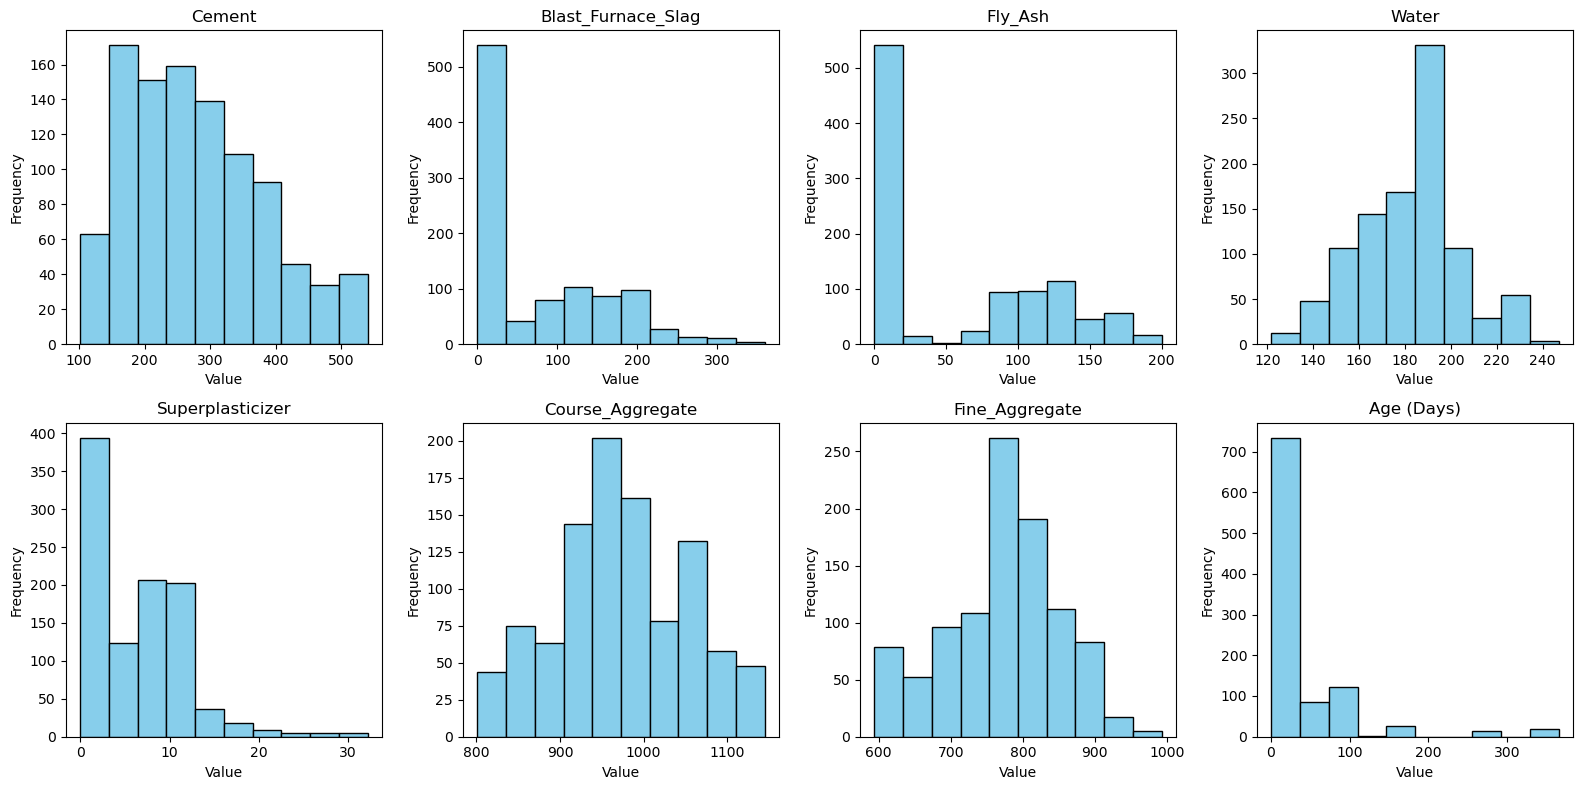

In [36]:
#plot histograms
make_histogram(data, 2, 4, (16, 8))